In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv("Call_Center_1999_DataSet.csv", sep = ";")

C:\Users\Pablo\AppData\Local\Temp\ipykernel_7488\350019089.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Call_Center_1999_DataSet.csv", sep = ";")


In [23]:
for i in (df.vru_time):
    if i > 4000:
        print(i)

4832


In [28]:
df = df.rename(columns = {"vru.line": "vru_line"})  #renombro la columna para que luego no me genere problemas cuando la llame con el "."

,vru_line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,0,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0


In [30]:
df.tail()

,vru_line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
444443,AA0216,17211,0.0,0,IN,1999-12-31,13:46:51,13:47:04,13,0:00:00,0:00:00,0,AGENT,13:47:03,13:56:16,553,Z2ELINOR,334
444444,AA0216,17212,0.0,0,IN,1999-12-31,13:58:31,13:58:40,9,13:58:40,13:59:49,69,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444445,AA0216,17213,0.0,0,IN,1999-12-31,17:10:51,17:11:12,21,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444446,AA0216,17214,0.0,0,IN,1999-12-31,18:30:19,18:30:54,35,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334
444447,AA0216,17215,0.0,0,IN,1999-12-31,22:23:35,22:23:45,10,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,334


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


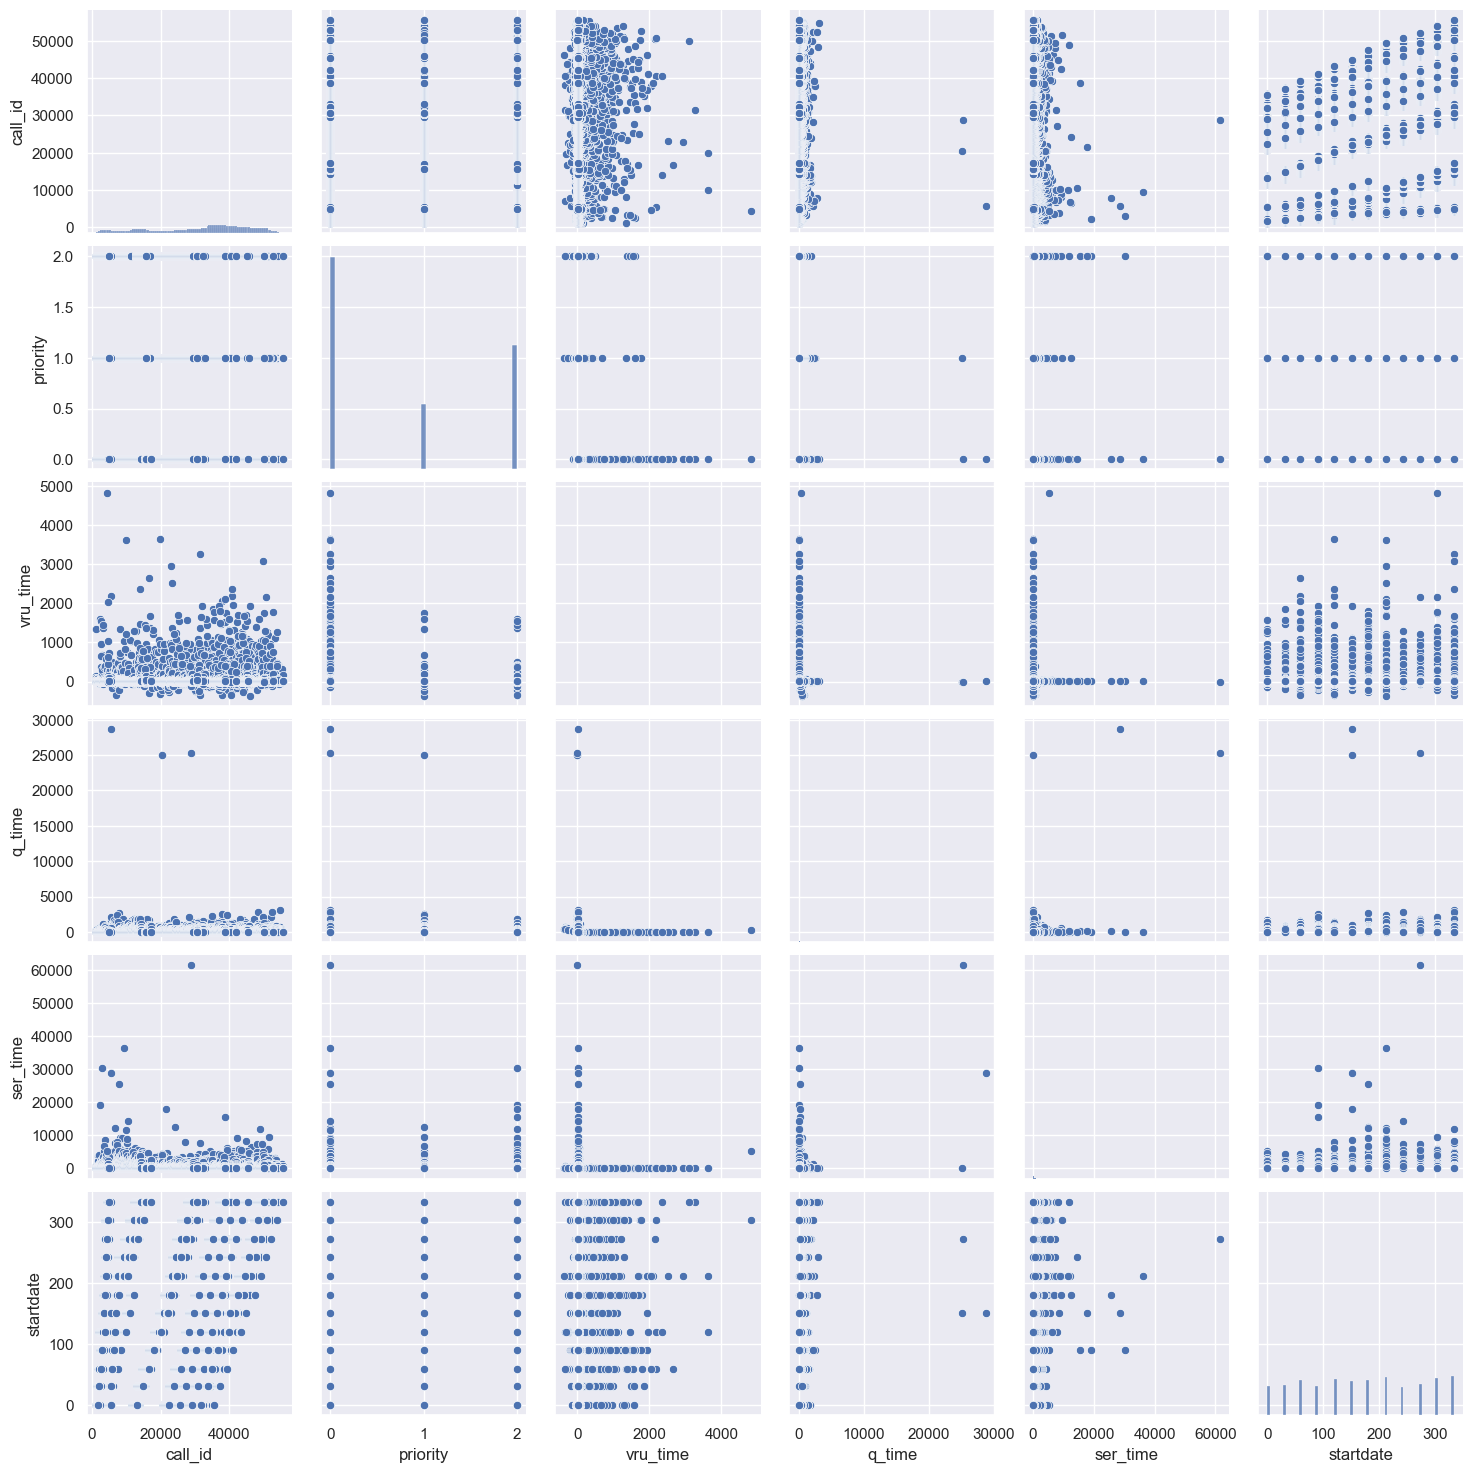

In [5]:
sns.pairplot(data = df)         #anális previo

In [44]:
device_counts = df.groupby('vru_line')['call_id'].count()
device_counts

vru_line
AA0101    17509
AA0102    11877
AA0103    17627
AA0104    17603
AA0105    17452
AA0106    17627
AA0107     3422
AA0108     3372
AA0109    17580
AA0110    17485
AA0111     3381
AA0112     2178
AA0113    12304
AA0114     1237
AA0115    17043
AA0116     9342
AA0201    17932
AA0202    21314
AA0203    20056
AA0204    19011
AA0205    20247
AA0206    21087
AA0207    12665
AA0208    13519
AA0209    21423
AA0210    19157
AA0213    20552
AA0214    19897
AA0215    18697
AA0216    11852
Name: call_id, dtype: int64

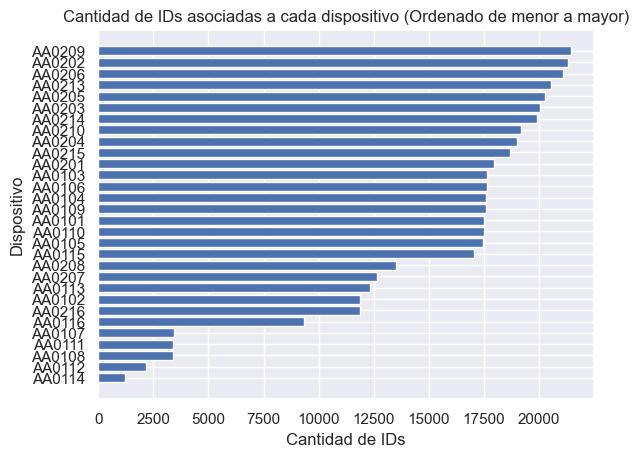

'\nSe puede observar una desproporción, a priori, de la cantidad de llamadas por \ndispositivo, siendo que el AA0114 es el menos usado\n'

In [52]:

device_counts = df.groupby('vru_line')['call_id'].count().sort_values()

plt.barh(device_counts.index, device_counts.values)
plt.xlabel('Cantidad de IDs')
plt.ylabel('Dispositivo')
plt.title('Cantidad de IDs asociadas a cada dispositivo (Ordenado de menor a mayor)')
plt.show()

"""
Se puede observar una desproporción, a priori, de la cantidad de llamadas por 
dispositivo, siendo que el AA0114 es el menos usado
"""


#mañana buscar outliers en los tiempos y el "sertime por dispositivo", 
# cantidad de llamadas puede ser util como metrica